In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
data = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\csv_files\\wrst_hist\\NHS_44_features.csv')

In [3]:
data.head()

,Diagnosis,Entropy RGB,Entropy HSV,Entropy LAB,Entropy YCrCb,Variance RGB,Variance HSV,Variance LAB,Variance YCrCb,Skewness RGB,...,Sum average,Sum entropy,Sum variance,Entropy,Inverse difference moment,Homogenity,Difference variance,Difference entropy,Dissimilarity,Inertia
0,B,0.736,0.550,0.624,0.636,0.396,0.0666,0.386,0.395,0.321,...,0.828,0.755,0.329,0.597,0.671,0.830,0.297,0.609,0.634,0.840
1,B,0.743,0.564,0.634,0.643,0.396,0.0658,0.382,0.391,0.299,...,0.809,0.772,0.296,0.596,0.659,0.843,0.270,0.601,0.629,0.848
2,B,0.750,0.405,0.668,0.672,0.485,0.0394,0.493,0.474,0.212,...,0.817,0.767,0.223,0.767,0.535,0.904,0.224,0.759,0.518,0.901
3,B,0.750,0.461,0.672,0.684,0.512,0.0530,0.532,0.513,0.183,...,0.755,0.803,0.227,0.757,0.537,0.901,0.225,0.759,0.514,0.900
4,B,0.717,0.600,0.544,0.556,0.390,0.0775,0.318,0.335,0.275,...,0.816,0.768,0.333,0.531,0.707,0.817,0.310,0.533,0.679,0.823


In [4]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['Diagnosis', 'Entropy RGB', 'Entropy HSV', 'Entropy LAB',
       'Entropy YCrCb', 'Variance RGB', 'Variance HSV', 'Variance LAB',
       'Variance YCrCb', 'Skewness RGB', 'Skewness HSV', 'Skewness LAB',
       'Skewness YCrCb', 'Kurtosis RGB', 'Kurtosis HSV', 'Kurtosis LAB',
       'Kurtosis YCrCb', 'Pixel intensity R', 'Pixel intensity G',
       'Pixel intensity B', 'Pixel intensity H', 'Pixel intensity S',
       'Pixel intensity V', 'Pixel intensity L', 'Pixel intensity a',
       'Pixel intensity b', 'Pixel intensity Y', 'Pixel intensity Cr',
       'Pixel intensity Cb', 'Average', 'Contrast', 'Variance', 'Energy',
       'Angular 2nd moment', 'Correlation', 'Sum average', 'Sum entropy',
       'Sum variance', 'Entropy', 'Inverse difference moment', 'Homogenity',
       'Difference variance', 'Difference entropy', 'Dissimilarity',
       'Inertia'],
      dtype='object')


In [5]:
# y includes our labels and x includes our features
y = data.Diagnosis                         # 1 or 0 
list = ['Diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,Entropy RGB,Entropy HSV,Entropy LAB,Entropy YCrCb,Variance RGB,Variance HSV,Variance LAB,Variance YCrCb,Skewness RGB,Skewness HSV,...,Sum average,Sum entropy,Sum variance,Entropy,Inverse difference moment,Homogenity,Difference variance,Difference entropy,Dissimilarity,Inertia
0,0.736,0.550,0.624,0.636,0.396,0.0666,0.386,0.395,0.321,0.752,...,0.828,0.755,0.329,0.597,0.671,0.830,0.297,0.609,0.634,0.840
1,0.743,0.564,0.634,0.643,0.396,0.0658,0.382,0.391,0.299,0.760,...,0.809,0.772,0.296,0.596,0.659,0.843,0.270,0.601,0.629,0.848
2,0.750,0.405,0.668,0.672,0.485,0.0394,0.493,0.474,0.212,0.715,...,0.817,0.767,0.223,0.767,0.535,0.904,0.224,0.759,0.518,0.901
3,0.750,0.461,0.672,0.684,0.512,0.0530,0.532,0.513,0.183,0.716,...,0.755,0.803,0.227,0.757,0.537,0.901,0.225,0.759,0.514,0.900
4,0.717,0.600,0.544,0.556,0.390,0.0775,0.318,0.335,0.275,0.734,...,0.816,0.768,0.333,0.531,0.707,0.817,0.310,0.533,0.679,0.823


In [6]:
ax = sns.countplot(y,label="Count")       # 0 = 2841, 1 = 796
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  2841
Number of Malignant :  796


C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


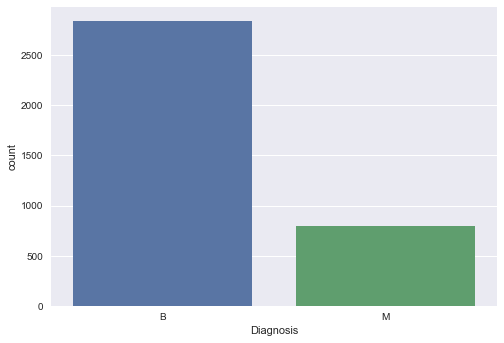

In [7]:
plt.show()

In [8]:
x.describe()

,Entropy RGB,Entropy HSV,Entropy LAB,Entropy YCrCb,Variance RGB,Variance HSV,Variance LAB,Variance YCrCb,Skewness RGB,Skewness HSV,...,Sum average,Sum entropy,Sum variance,Entropy,Inverse difference moment,Homogenity,Difference variance,Difference entropy,Dissimilarity,Inertia
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,...,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.00000
mean,0.716093,0.386115,0.621682,0.620592,0.427370,0.057409,0.427860,0.421862,0.327600,0.663996,...,0.580944,0.550749,0.288495,0.461929,0.497713,0.609155,0.279175,0.457267,0.482878,0.60843
std,0.113630,0.136939,0.125002,0.128815,0.135727,0.051703,0.134637,0.135982,0.119461,0.126836,...,0.305174,0.319053,0.161909,0.239477,0.259151,0.348179,0.159895,0.236916,0.254023,0.34732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.648000,0.290000,0.548000,0.544000,0.336000,0.030000,0.339000,0.332000,0.246000,0.599000,...,0.171000,0.102000,0.169000,0.177000,0.173000,0.118000,0.161000,0.177000,0.168000,0.11900
50%,0.727000,0.378000,0.629000,0.630000,0.420000,0.044900,0.415000,0.409000,0.316000,0.700000,...,0.730000,0.720000,0.268000,0.540000,0.597000,0.805000,0.259000,0.534000,0.576000,0.80500
75%,0.794000,0.474000,0.707000,0.708000,0.509000,0.068100,0.500000,0.495000,0.393000,0.749000,...,0.814000,0.781000,0.380000,0.645000,0.692000,0.861000,0.367000,0.639000,0.675000,0.86100
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
# first 11 features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:11]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

In [10]:
# Second 11 features
data = pd.concat([y,data_n_2.iloc[:,11:22]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

In [11]:
# Third 11 features
data = pd.concat([y,data_n_2.iloc[:,22:33]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

In [12]:
# Fourth 11 features
data = pd.concat([y,data_n_2.iloc[:,33:44]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
C:\Users\suleiman\Anaconda3\lib\site-packages\seaborn\categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

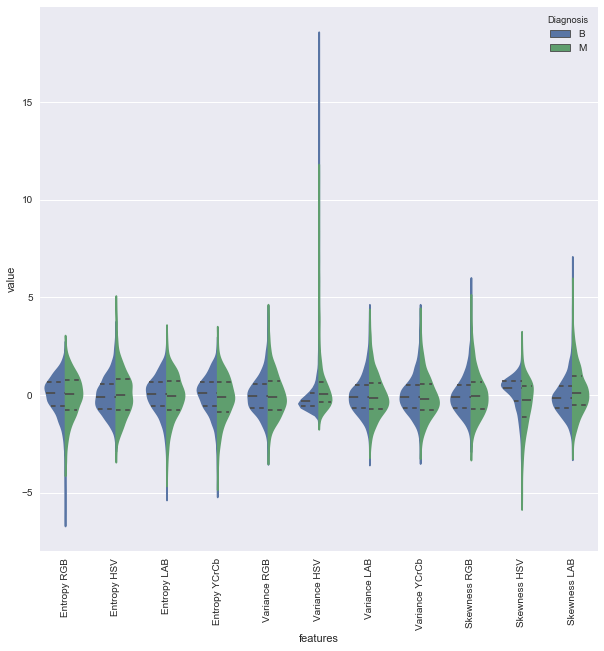

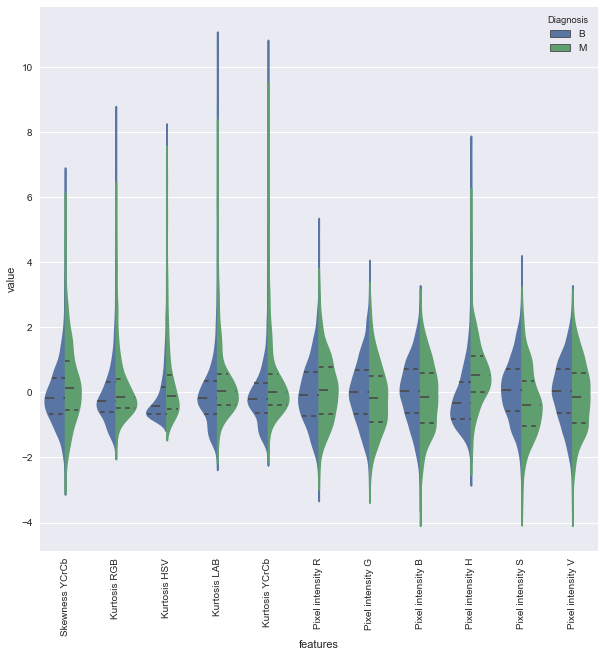

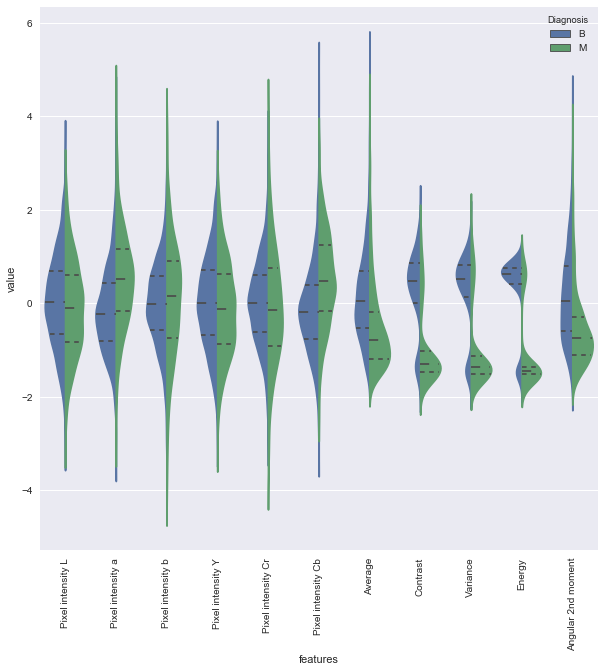

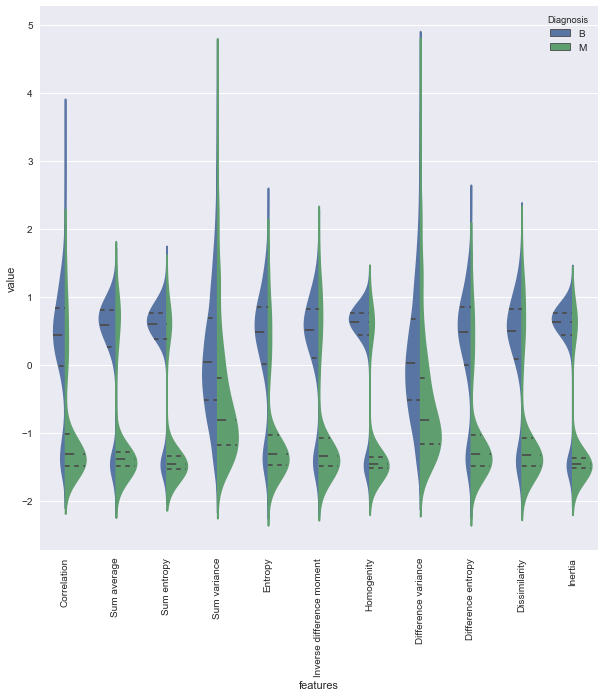

In [13]:
plt.show()

In [14]:
sns.jointplot(x.loc[:,'Entropy RGB'], x.loc[:,'Entropy HSV'], kind="regg", color="#ce1414")

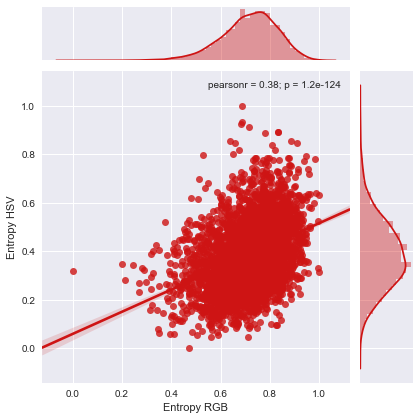

In [15]:
plt.show()

C:\Users\suleiman\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


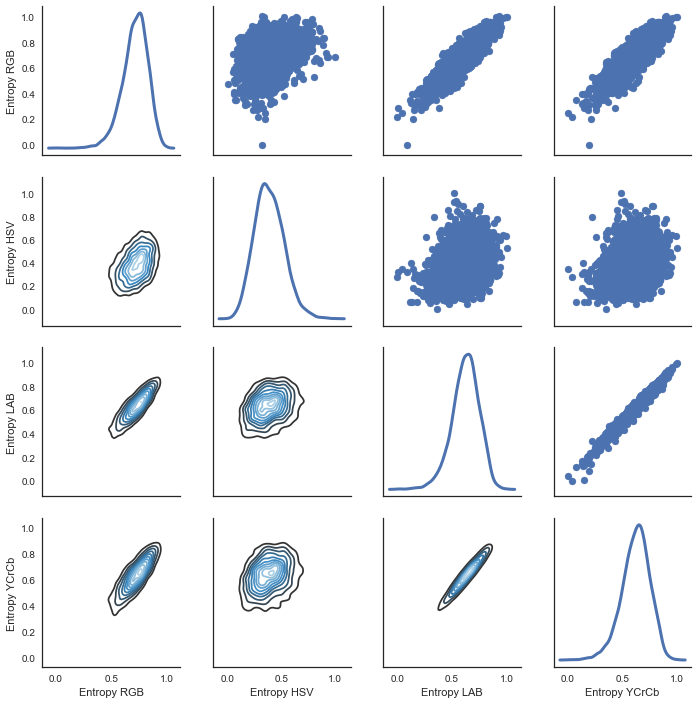

In [16]:
sns.set(style="white")
df = x.loc[:,['Entropy RGB','Entropy HSV','Entropy LAB', 'Entropy YCrCb']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [17]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:22]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data)

plt.xticks(rotation=90)

KeyboardInterrupt: 

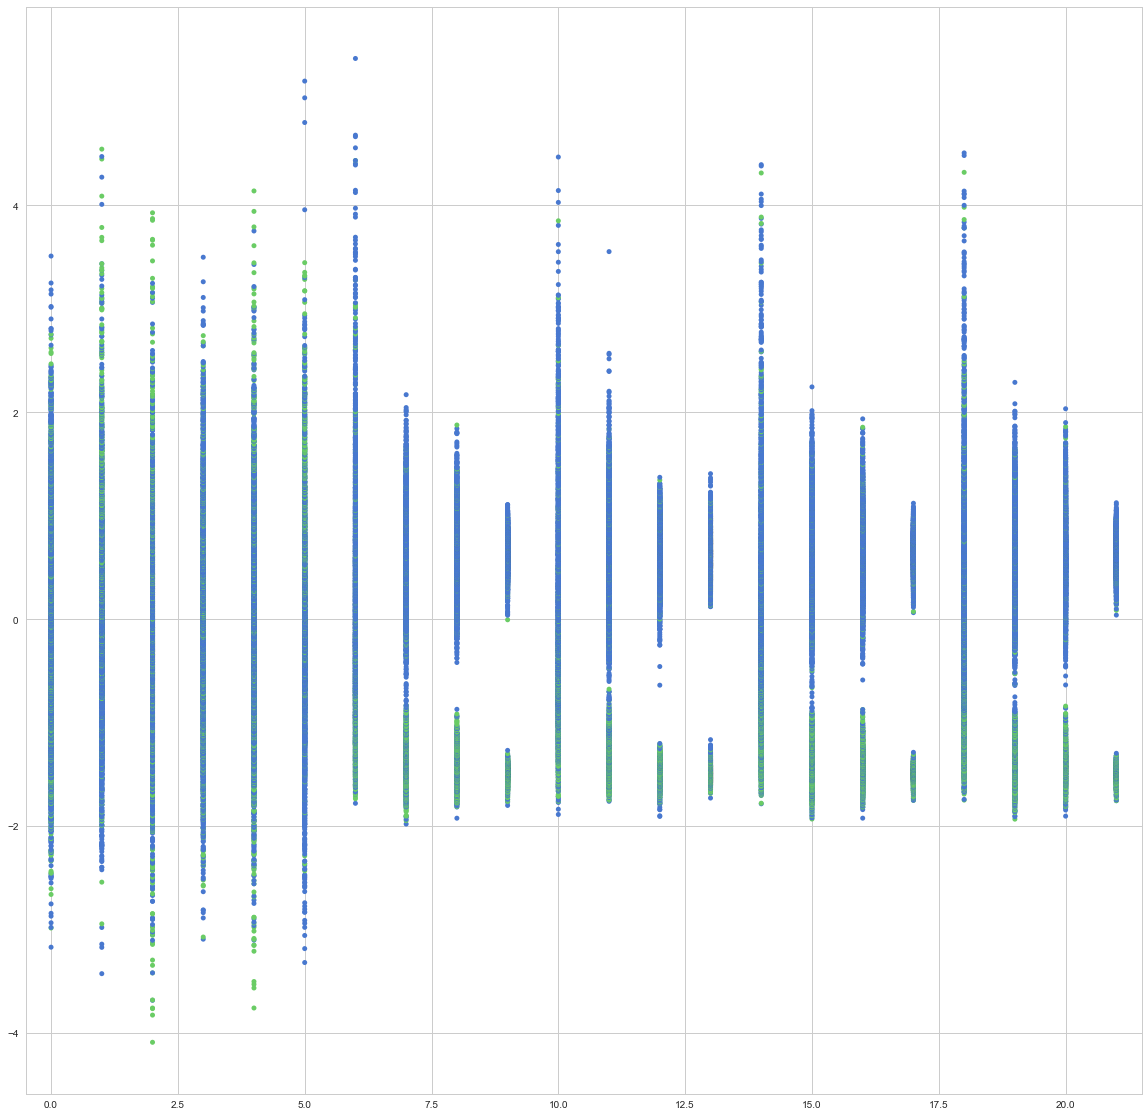

In [20]:
plt.show()

In [19]:
data = pd.concat([y,data_n_2.iloc[:,22:44]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=90)

KeyboardInterrupt: 

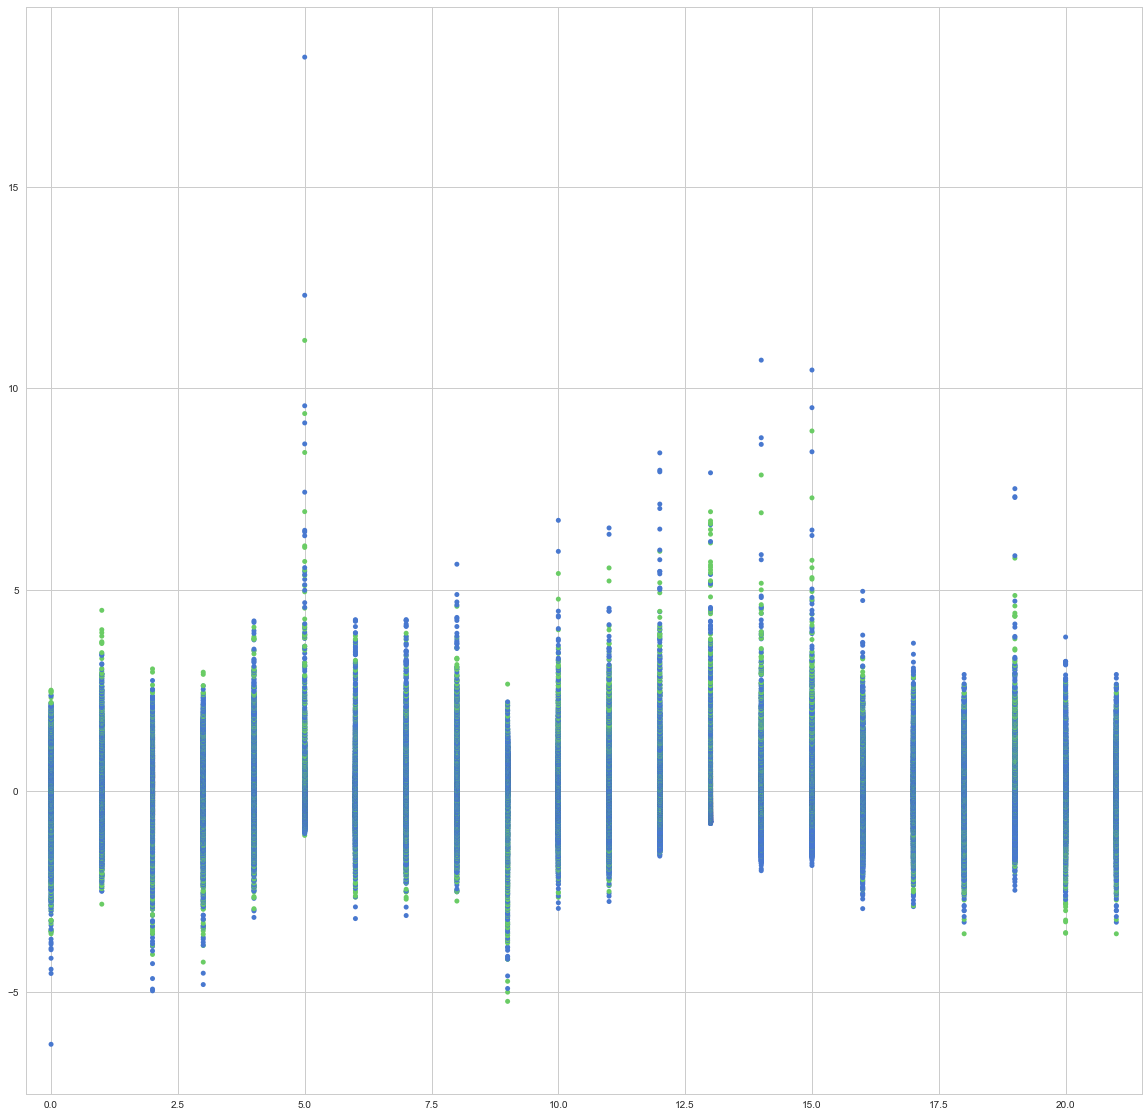

In [18]:
plt.show()

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

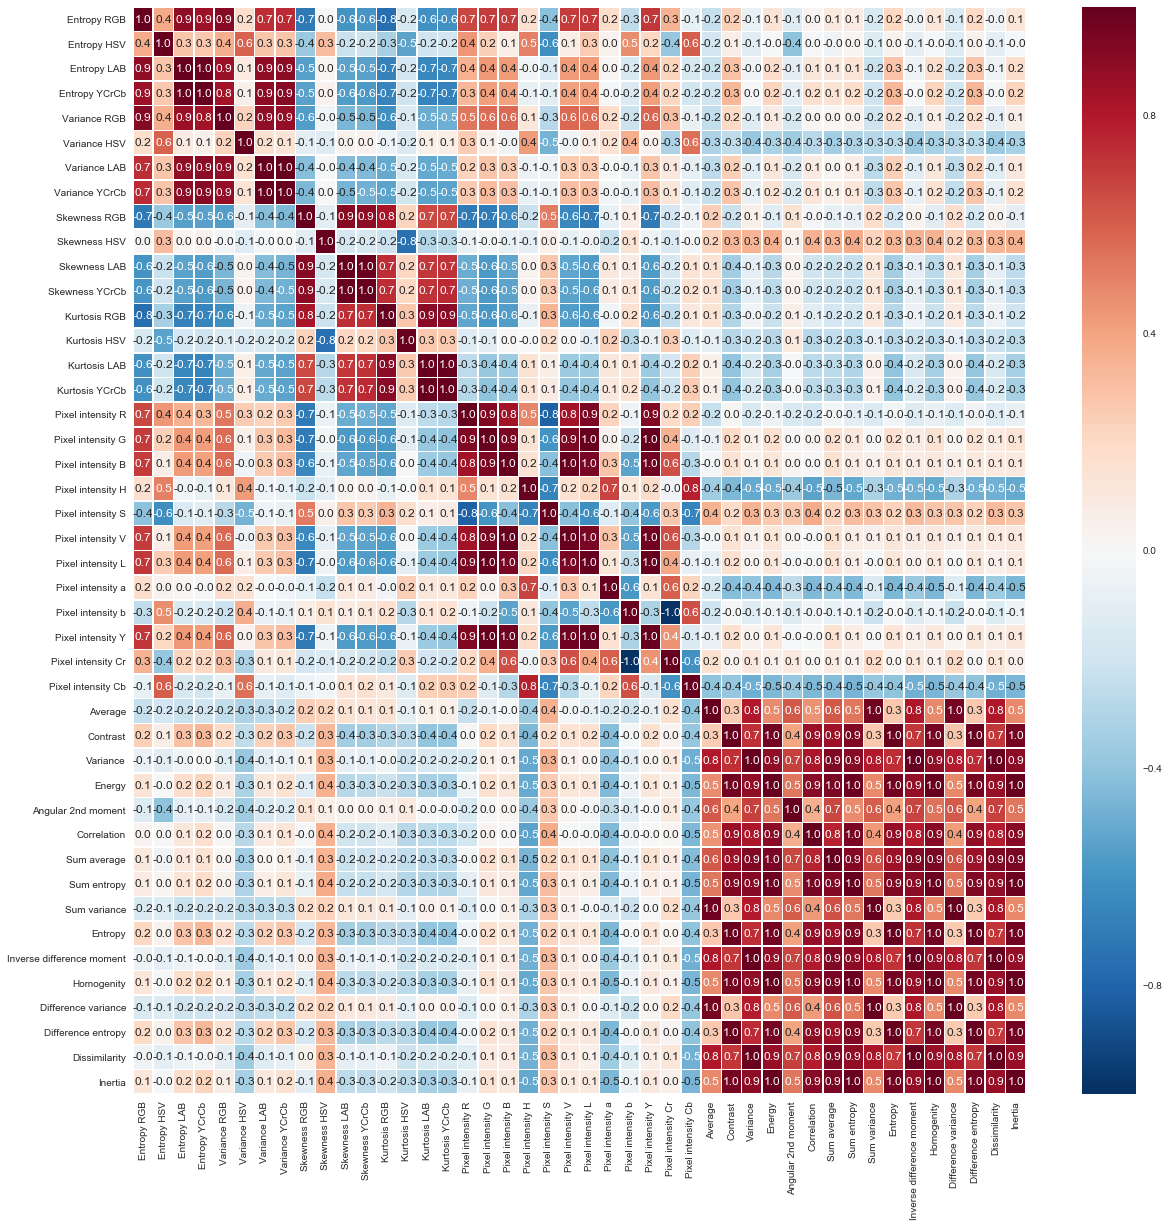

In [15]:
plt.show()

In [20]:
['Entropy RGB', 'Entropy HSV','Entropy LAB','Entropy YCrCb','Variance RGB', 'Variance HSV','Variance LAB','Variance YCrCb',
              'Skewness RGB', 'Skewness HSV','Skewness LAB','Skewness YCrCb','Kurtosis RGB', 'Kurtosis HSV','Kurtosis LAB','Kurtosis YCrCb',
              'Pixel intensity R','Pixel intensity G','Pixel intensity B','Pixel intensity H','Pixel intensity S','Pixel intensity V',
              'Pixel intensity L','Pixel intensity a','Pixel intensity b','Pixel intensity Y','Pixel intensity Cr','Pixel intensity Cb',
              'Average','Contrast','Variance','Energy','Angular 2nd moment','Correlation','Sum average','Sum entropy','Sum variance',
              'Entropy','Inverse difference moment','Homogenity','Difference variance','Difference entropy','Dissimilarity','Inertia']

['Entropy RGB',
 'Entropy HSV',
 'Entropy LAB',
 'Entropy YCrCb',
 'Variance RGB',
 'Variance HSV',
 'Variance LAB',
 'Variance YCrCb',
 'Skewness RGB',
 'Skewness HSV',
 'Skewness LAB',
 'Skewness YCrCb',
 'Kurtosis RGB',
 'Kurtosis HSV',
 'Kurtosis LAB',
 'Kurtosis YCrCb',
 'Pixel intensity R',
 'Pixel intensity G',
 'Pixel intensity B',
 'Pixel intensity H',
 'Pixel intensity S',
 'Pixel intensity V',
 'Pixel intensity L',
 'Pixel intensity a',
 'Pixel intensity b',
 'Pixel intensity Y',
 'Pixel intensity Cr',
 'Pixel intensity Cb',
 'Average',
 'Contrast',
 'Variance',
 'Energy',
 'Angular 2nd moment',
 'Correlation',
 'Sum average',
 'Sum entropy',
 'Sum variance',
 'Entropy',
 'Inverse difference moment',
 'Homogenity',
 'Difference variance',
 'Difference entropy',
 'Dissimilarity',
 'Inertia']

In [22]:
['Entropy RGB', 'Entropy LAB','Variance HSV','Skewness HSV', 'Kurtosis HSV','Kurtosis LAB','Kurtosis YCrCb',
              'Pixel intensity a','Pixel intensity Cr','Pixel intensity Cb', 'Energy','Entropy','Homogenity']

['Entropy RGB',
 'Entropy LAB',
 'Variance HSV',
 'Skewness HSV',
 'Kurtosis HSV',
 'Kurtosis LAB',
 'Kurtosis YCrCb',
 'Pixel intensity a',
 'Pixel intensity Cr',
 'Pixel intensity Cb',
 'Energy',
 'Entropy',
 'Homogenity']

In [16]:
drop_list1 = ['Entropy HSV','Entropy YCrCb','Variance RGB', 'Variance LAB','Variance YCrCb',
              'Skewness RGB', 'Skewness HSV','Skewness LAB','Skewness YCrCb','Kurtosis RGB',
              'Pixel intensity R','Pixel intensity G','Pixel intensity B','Pixel intensity H','Pixel intensity S','Pixel intensity V',
              'Pixel intensity L','Pixel intensity b','Pixel intensity Y',
             # 'Contrast',
             # 'Homogenity',
             # 'Energy',
              'Average','Variance','Angular 2nd moment','Correlation','Sum average','Sum entropy','Sum variance',
            'Inverse difference moment','Difference variance','Difference entropy','Dissimilarity','Inertia']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,Entropy RGB,Entropy LAB,Variance HSV,Kurtosis HSV,Kurtosis LAB,Kurtosis YCrCb,Pixel intensity a,Pixel intensity Cr,Pixel intensity Cb,Contrast,Energy,Entropy,Homogenity
0,0.736,0.624,0.0666,0.03100,0.200,0.1870,0.458,0.446,0.469,0.611,0.838,0.597,0.830
1,0.743,0.634,0.0658,0.01060,0.172,0.1600,0.477,0.455,0.473,0.615,0.849,0.596,0.843
2,0.750,0.668,0.0394,0.01320,0.138,0.1330,0.406,0.453,0.387,0.799,0.924,0.767,0.904
3,0.750,0.672,0.0530,0.00812,0.129,0.1240,0.420,0.450,0.405,0.803,0.920,0.757,0.901
4,0.717,0.544,0.0775,0.02570,0.102,0.0935,0.412,0.405,0.499,0.565,0.840,0.531,0.817


In [34]:
#correlation map
sns.set(font_scale=2.6)
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.2f')

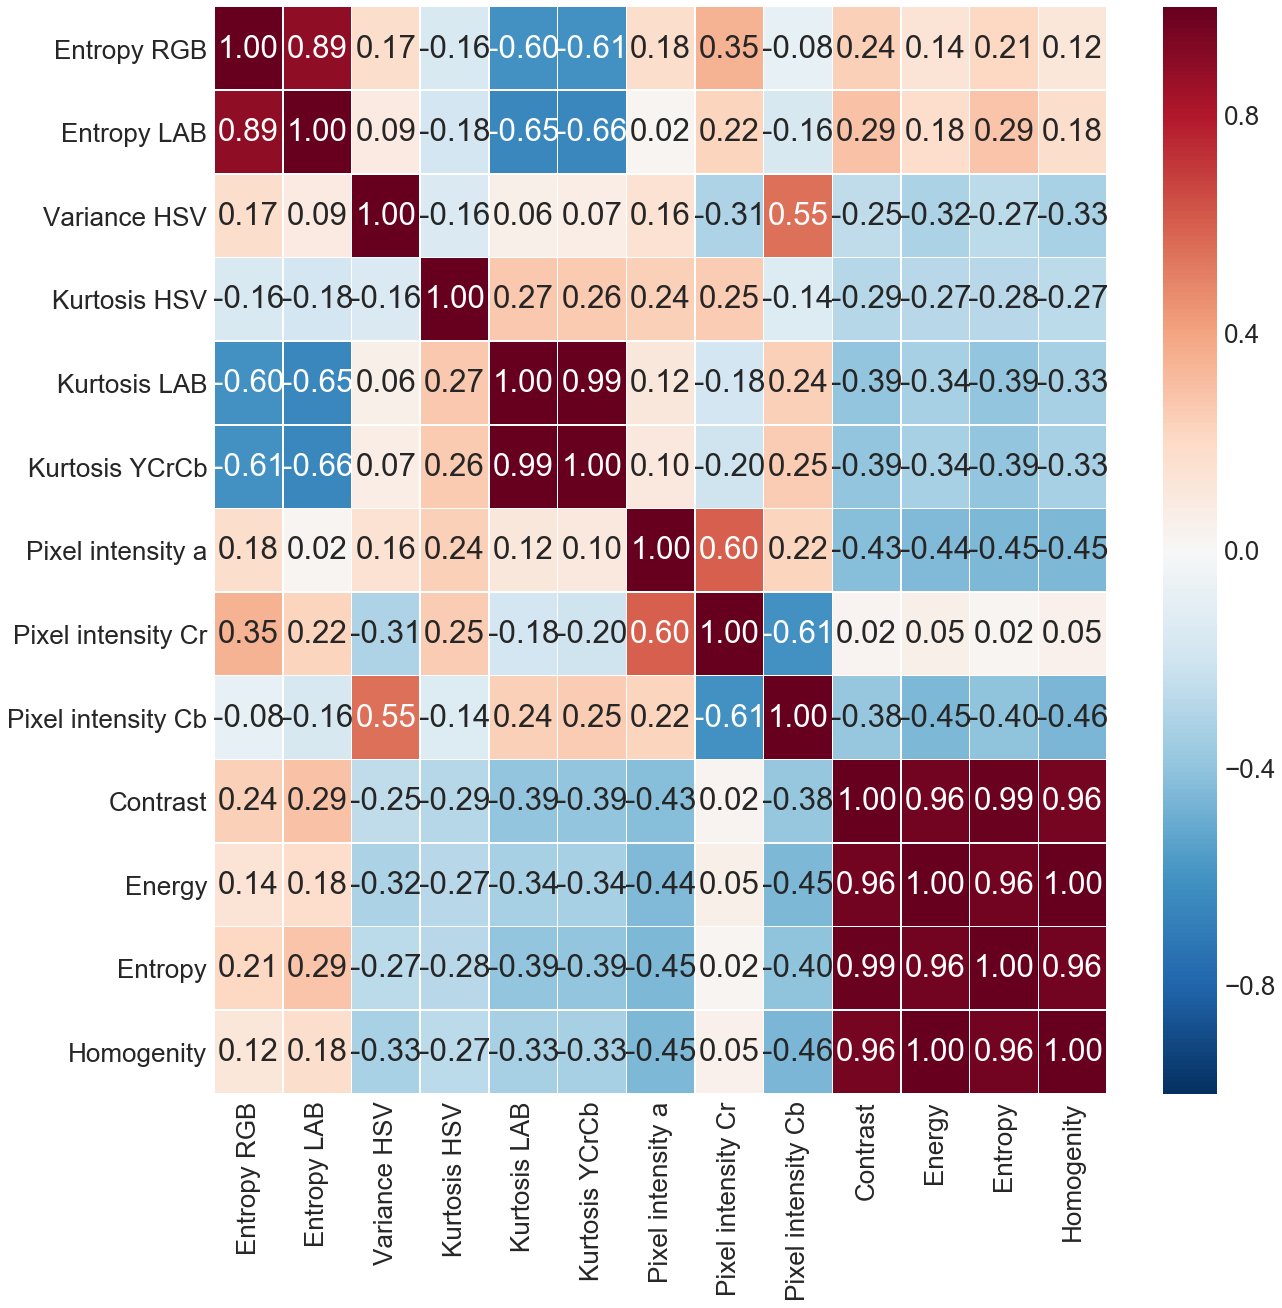

In [35]:
plt.show()

In [32]:
drop_list2 = ['Entropy RGB', 'Entropy HSV','Entropy LAB','Entropy YCrCb','Variance RGB', 'Variance HSV','Variance LAB','Variance YCrCb',
              'Skewness RGB', 'Skewness HSV','Skewness LAB','Skewness YCrCb','Kurtosis RGB', 'Kurtosis HSV','Kurtosis LAB','Kurtosis YCrCb',
              'Pixel intensity R','Pixel intensity G','Pixel intensity B','Pixel intensity H','Pixel intensity S','Pixel intensity V',
              'Pixel intensity L','Pixel intensity a','Pixel intensity b','Pixel intensity Y','Pixel intensity Cr','Pixel intensity Cb',
              'Average','Entropy','Variance','Angular 2nd moment','Correlation','Sum average','Sum entropy','Sum variance',
              'Inverse difference moment','Difference variance','Difference entropy','Dissimilarity','Inertia']
x_2 = x.drop(drop_list2,axis = 1 )        # do not modify x, we will use it later 
x_2.head()

,Contrast,Energy,Homogenity
0,0.611,0.838,0.830
1,0.615,0.849,0.843
2,0.799,0.924,0.904
3,0.803,0.920,0.901
4,0.565,0.840,0.817


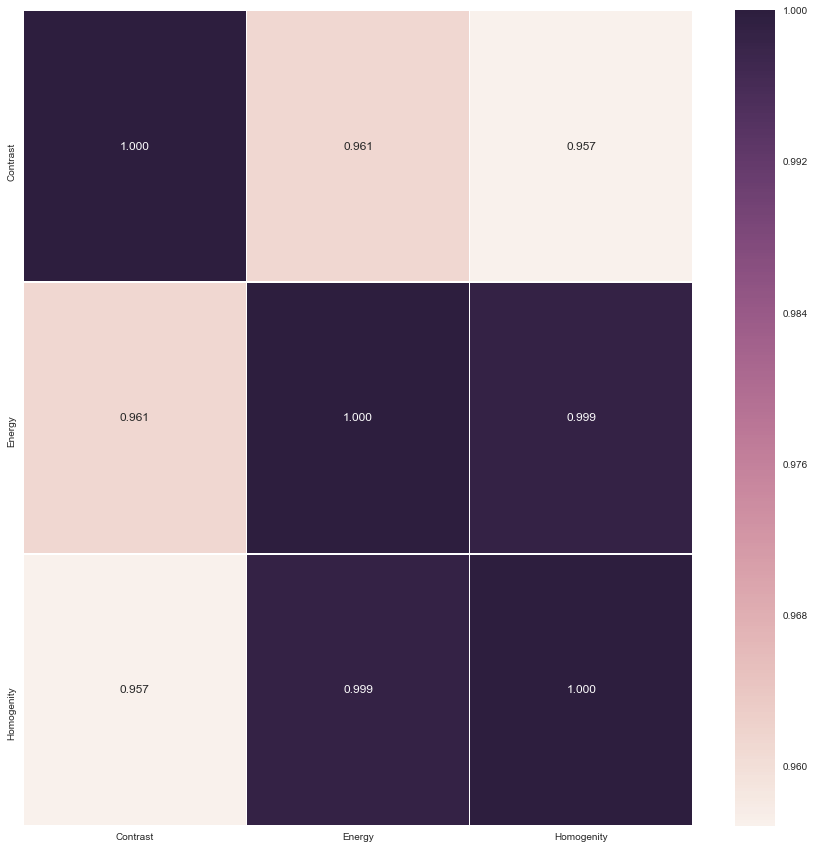

In [33]:
#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(x_2.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.8067765567765568


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [30]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [4.20480770e-03 3.37543612e-01 5.12311802e-02 2.28164919e-01
 7.00730841e-02 4.39297481e+00 6.47757530e-04 7.32662720e-02
 2.92121188e-02 3.57692200e+00 1.38566896e+00 1.49381504e+00
 9.14492857e-01 7.92045524e+00 2.51217317e+00 2.84486043e+00
 3.96333825e-01 7.58658969e-01 3.18487403e-01 1.15759379e+01
 3.64038370e+00 3.16234851e-01 2.64268892e-01 7.83023060e+00
 1.09454504e-01 3.56684497e-01 7.78101466e-02 7.52170890e+00]
Feature list: Index(['Entropy RGB', 'Entropy HSV', 'Entropy LAB', 'Entropy YCrCb',
       'Variance RGB', 'Variance HSV', 'Variance Lab', 'Variance YCrCb',
       'Skewness RGB', 'Skewness HSV', 'Skewness Lab', 'Skewness YCrCb',
       'Kurtosis RGB', 'Kurtosis HSV', 'Kurtosis LAB', 'Kurtosis YCrCb',
       'Pixel intensity R', 'Pixel intensity G', 'Pixel intensity B',
       'Pixel intensity H', 'Pixel intensity S', 'Pixel intensity V',
       'Pixel intensity L', 'Pixel intensity a', 'Pixel intensity b',
       'Pixel intensity Y', 'Pixel intensity Cr'

In [31]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


Accuracy is:  0.7884615384615384


In [32]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

In [33]:
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['Variance HSV', 'Variance Lab', 'Skewness HSV', 'Kurtosis HSV',
       'Pixel intensity B', 'Pixel intensity H', 'Pixel intensity S',
       'Pixel intensity a', 'Pixel intensity Cr', 'Pixel intensity Cb'],
      dtype='object')


In [34]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 18
Best features : Index(['Entropy RGB', 'Entropy HSV', 'Entropy LAB', 'Entropy YCrCb',
       'Variance HSV', 'Skewness HSV', 'Skewness YCrCb', 'Kurtosis RGB',
       'Kurtosis HSV', 'Kurtosis YCrCb', 'Pixel intensity H',
       'Pixel intensity S', 'Pixel intensity V', 'Pixel intensity a',
       'Pixel intensity b', 'Pixel intensity Y', 'Pixel intensity Cr',
       'Pixel intensity Cb'],
      dtype='object')


C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


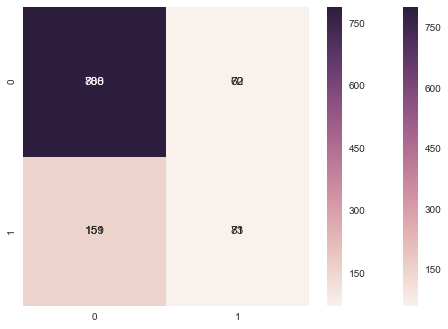

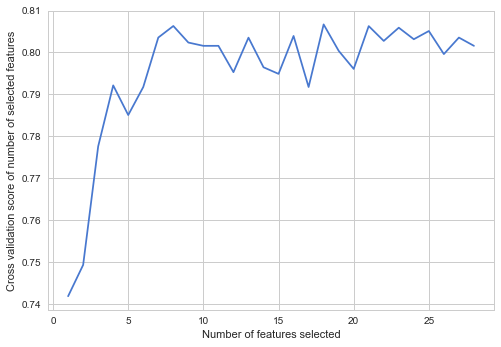

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected Color features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 19 (0.114822)
2. feature 27 (0.062958)
3. feature 9 (0.057428)
4. feature 5 (0.051898)
5. feature 23 (0.047009)
6. feature 13 (0.044307)
7. feature 24 (0.039465)
8. feature 1 (0.035475)
9. feature 26 (0.035450)
10. feature 2 (0.035363)
11. feature 14 (0.034029)
12. feature 15 (0.033202)
13. feature 7 (0.030555)
14. feature 20 (0.030157)
15. feature 8 (0.029991)
16. feature 21 (0.029169)
17. feature 25 (0.028045)
18. feature 16 (0.027683)
19. feature 18 (0.027222)
20. feature 11 (0.027121)
21. feature 17 (0.025625)
22. feature 12 (0.024003)
23. feature 22 (0.023245)
24. feature 6 (0.022494)
25. feature 10 (0.022049)
26. feature 0 (0.021008)
27. feature 4 (0.020549)
28. feature 3 (0.019677)


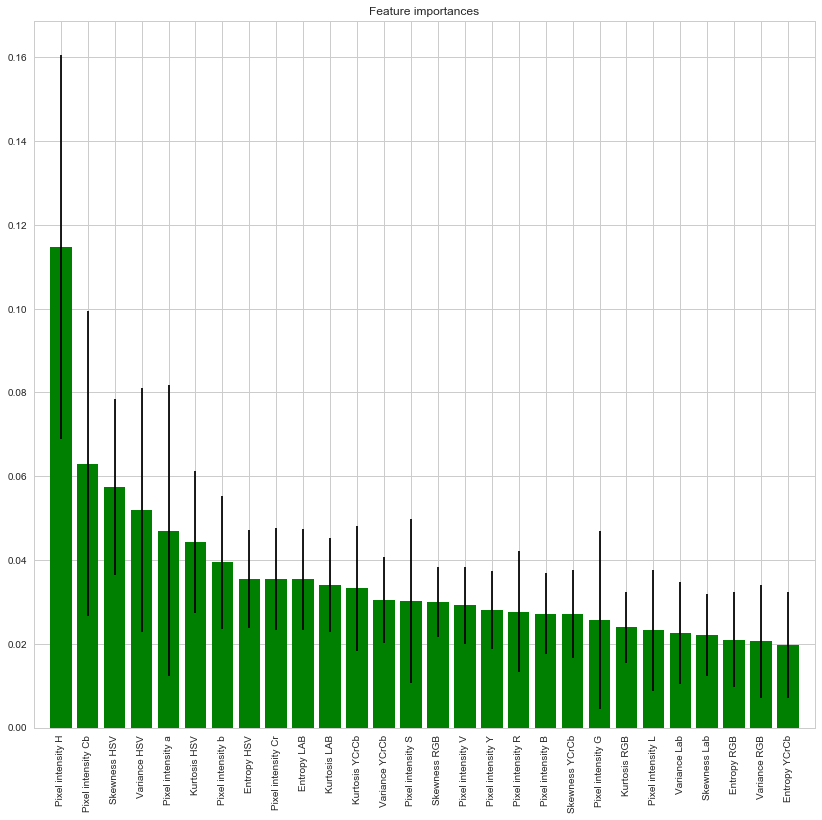

In [36]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [37]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

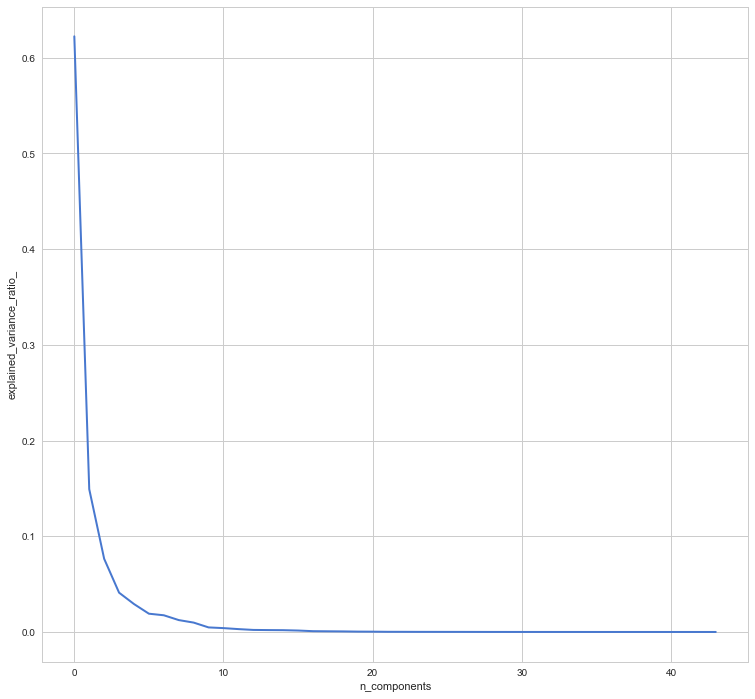

In [38]:
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_2, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.8058608058608059


In [40]:
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [41]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [ 18.11509839  83.57470844  94.26271043 150.79621526  22.45847792
  71.67338474 116.69238433 144.70714279  21.39775212  86.18779098
  90.64258593 157.13423739  21.20640869  85.11031089  88.72655345
 156.59428954]
Feature list: Index(['Contrast RGB', 'Energy RGB', 'Entropy Data RGB', 'Homogenity RGB',
       'Contrast HSV', 'Energy HSV', 'Entropy Data HSV', 'Homogenity HSV',
       'Contrast Lab', 'Energy Lab', 'Entropy Data Lab', 'Homogenity Lab',
       'Contrast Lu', 'Energy Lu', 'Entropy Data Lu', 'Homogenity Lu'],
      dtype='object')


In [42]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


Accuracy is:  0.8168498168498168


In [43]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['Energy RGB', 'Entropy Data RGB', 'Contrast HSV', 'Energy HSV',
       'Entropy Data HSV', 'Homogenity HSV', 'Energy Lab', 'Contrast Lu',
       'Energy Lu', 'Entropy Data Lu'],
      dtype='object')


In [44]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 8
Best features : Index(['Energy RGB', 'Contrast HSV', 'Energy HSV', 'Entropy Data HSV',
       'Homogenity HSV', 'Energy Lab', 'Contrast Lu', 'Homogenity Lu'],
      dtype='object')


C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


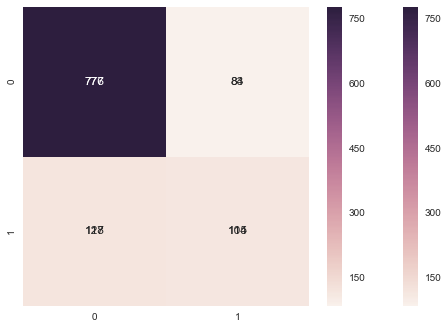

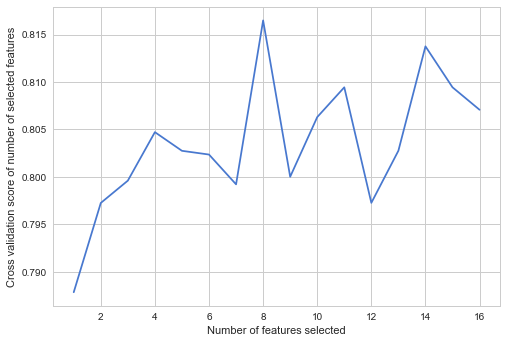

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected Texture features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 7 (0.121096)
2. feature 13 (0.115101)
3. feature 5 (0.112291)
4. feature 6 (0.083103)
5. feature 15 (0.078785)
6. feature 1 (0.075383)
7. feature 3 (0.070328)
8. feature 0 (0.046584)
9. feature 4 (0.045241)
10. feature 8 (0.044694)
11. feature 2 (0.039185)
12. feature 9 (0.034957)
13. feature 14 (0.033901)
14. feature 12 (0.033892)
15. feature 11 (0.033803)
16. feature 10 (0.031653)


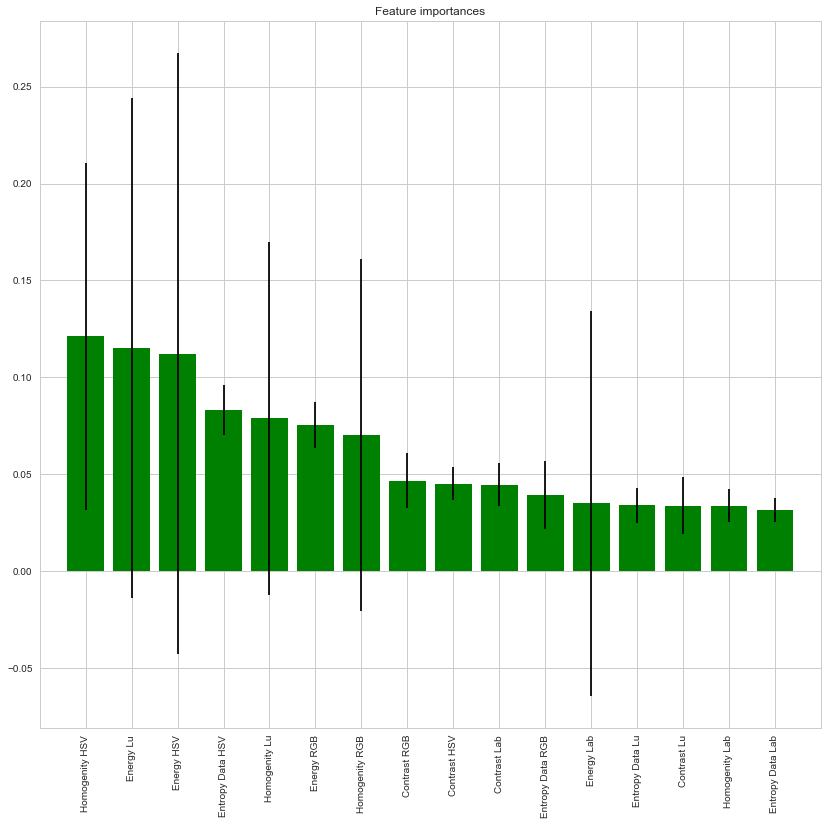

In [46]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()